In [292]:
# download unstructured data from source - kaggle 
# This is link to download txt file containing hospital data
url = "https://www.kaggle.com/datasets/rahulelhan21/patient-data?select=unstructured_patient_data.txt"
# save unstructured_patient_data.txt in workspace, to convert to structured data

In [293]:
import pandas as pd
import re

file_path = "C:/Users/lenovo/Desktop/Dic_Project/Data_Files/unstructured_patient_data.txt"
# Read the file and extract the data lines
with open(file_path, 'r') as file:
    raw_data = file.readlines()

# Create an empty list to store structured patient data
patients_data = []

# Loop through each line of the file to extract patient information
for line in raw_data:
    # Use regular expressions to extract relevant data fields
    patient_id = re.search(r'Patient (\w+)', line).group(1)
    age = int(re.search(r'(\d+)-year-old', line).group(1))
    gender = "Male" if "Male" in line else "Female"
    cholesterol = int(re.search(r'cholesterol level of (\d+) mg/dL', line).group(1))
    blood_pressure = re.search(r'blood pressure of (\d+/\d+)', line).group(1)
    heart_rate = int(re.search(r'heart rate of (\d+) beats per minute', line).group(1))
    diabetes = "Yes" if "has diabetes" in line else "No"
    family_history = "Yes" if "family history of heart disease" in line else "No"
    smoker = "Yes" if "smoker" in line else "No"
    bmi = float(re.search(r'BMI of (\d+.\d+)', line).group(1))
    physical_activity = int(re.search(r'engage in (\d+) days of physical activity', line).group(1))
    sedentary_time = float(re.search(r'spend (\d+.\d+) hours sedentary', line).group(1))
    sleep_duration = int(re.search(r'sleep for (\d+) hours per night', line).group(1))
    country = re.search(r'lives in (\w+(?: \w+)*)', line).group(1)
    hemisphere = "Northern" if "Northern Hemisphere" in line else "Southern"
    continent = re.search(r'located in (\w+)', line).group(1)
    heart_attack_risk = "High" if "risk of heart attack is assessed as high" in line else "Low"

    #   the extracted data to the list as a dictionary
    patients_data.append({
        "Patient ID": patient_id,
        "Age": age,
        "Gender": gender,
        "Cholesterol": cholesterol,
        "Blood Pressure": blood_pressure,
        "Heart Rate": heart_rate,
        "Diabetes": diabetes,
        "Family History of Heart Disease": family_history,
        "Smoking": smoker,
        "BMI": bmi,
        "Days of Physical Activity per Week": physical_activity,
        "Sedentary Time per Day (hours)": sedentary_time,
        "Sleep Duration (hours)": sleep_duration,
        "Country": country,
        "Continent": continent,
        "Hemisphere": hemisphere,
        "Risk of Heart Attack": heart_attack_risk
    })

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(patients_data)

# Display the first few rows of the DataFrame to verify the structured data
df.head()

# Save the DataFrame to a CSV file (optional)
df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv', index=False)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv')

# 1. Handle Missing Data
# Impute missing values in 'Cholesterol' and 'Heart Rate' with their mean values
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())

# 2. Remove Duplicate Rows
df = df.drop_duplicates()

# 3. Handle Outliers (using Z-score for 'BMI')
# Filter the dataset to keep only data points with a Z-score less than 3 for 'BMI'
df = df[np.abs(stats.zscore(df['BMI'])) < 3]

# 4. Convert Data Types
# Ensure 'Age' is an integer and 'Cholesterol' and 'Heart Rate' are numeric
df['Age'] = df['Age'].astype(int)
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'], errors='coerce')

# 5. Normalize Data (scaling 'Cholesterol' to a 0-1 range)
df['Cholesterol Normalized'] = (df['Cholesterol'] - df['Cholesterol'].min()) / (df['Cholesterol'].max() - df['Cholesterol'].min())

# 6. Standardize Text Fields
# Ensure 'Country' and 'Continent' are properly formatted
df['Country'] = df['Country'].str.title()
df['Continent'] = df['Continent'].str.title()

# 7. Handle Structural Errors
# Example: Remove special characters and standardize text in 'Hemisphere'
df['Hemisphere'] = df['Hemisphere'].str.replace('Hemisphere', '', regex=False).str.strip()

# 8. Binning (Feature Engineering)
# Bin 'Age' into categories: 'Young', 'Middle-aged', 'Senior'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# 9. Detect and Handle Data Inconsistencies
# Standardize 'Smoking' column (if it's inconsistent in some cases)
# Step 1: Explicitly convert the 'Smoking' column to an object (string) type before replacement
df['Smoking'] = df['Smoking'].astype(str)

# Step 2: Replace 'Yes' and 'No' with 1 and 0 in the 'Smoking' column
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})

# 10. Standardize Data Formats
# Split the 'Blood Pressure' column into two columns: 'Systolic' and 'Diastolic'
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert 'Systolic BP' and 'Diastolic BP' into numeric values
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

# Display cleaned data
print("\nCleaned Data:")
print(df.head())
# Save cleaned data to a new CSV file
pd.set_option("future.no_silent_downcasting", True)

df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

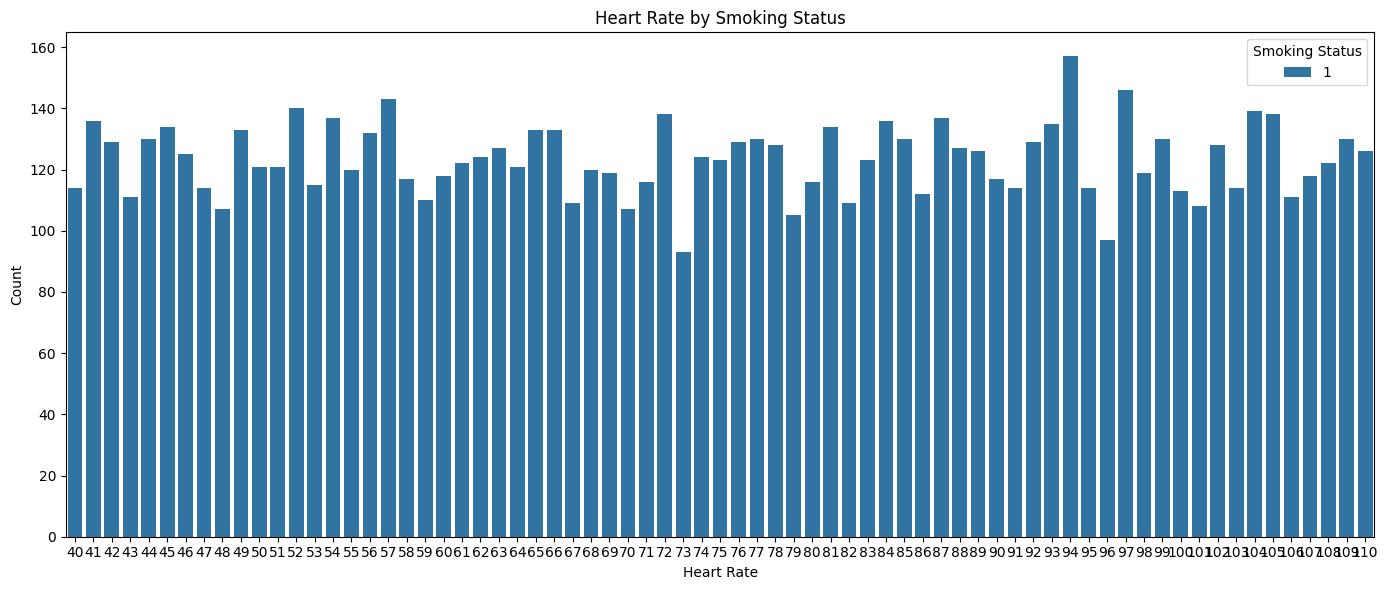

Heart Rate  40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Smoking                                                       ...             
1           114  136  129  111  130  134  125  114  107  133  ...  108  128   

Heart Rate  103  104  105  106  107  108  109  110  
Smoking                                             
1           114  139  138  111  118  122  130  126  

[1 rows x 71 columns]
Smoking
1    75.021682
Name: Heart Rate, dtype: float64


In [191]:
#Hypothesis 1(Smoking)[Shelly Tomar]

# EDA1(Using countplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Heart Attacks rate by Smoking Status
plt.figure(figsize=(14, 6))
sns.countplot(x='Heart Rate', hue='Smoking', data=smok_data)
plt.title('Heart Rate by Smoking Status')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by smoking status 
contingency_table = pd.crosstab(smok_data['Smoking'], smok_data['Heart Rate'])  # Adjust as necessary
print(contingency_table) 


# Calculate mean heart rate by smoking status
#This shows the mean heart rates for each smoking status group
mean_heart_rate = smok_data.groupby('Smoking')['Heart Rate'].mean() 
print(mean_heart_rate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

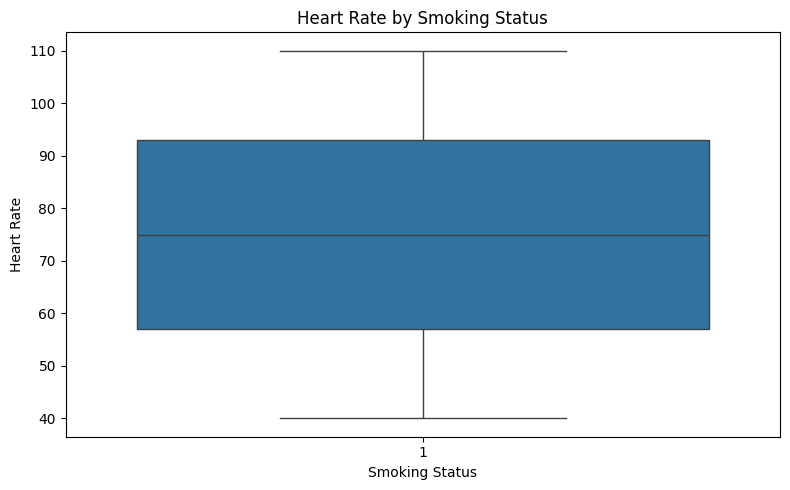

Heart Rate  40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Smoking                                                       ...             
1           114  136  129  111  130  134  125  114  107  133  ...  108  128   

Heart Rate  103  104  105  106  107  108  109  110  
Smoking                                             
1           114  139  138  111  118  122  130  126  

[1 rows x 71 columns]


In [194]:
#Hypothesis 1(Smoking)[Shelly Tomar]

# EDA1(Using boxplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Bivariate Analysis
# Heart Rate by Smoking Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Smoking', y='Heart Rate', data=smok_data)  # Replace with actual column names
plt.title('Heart Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Rate')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by smoking status 
contingency_table = pd.crosstab(smok_data['Smoking'], smok_data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

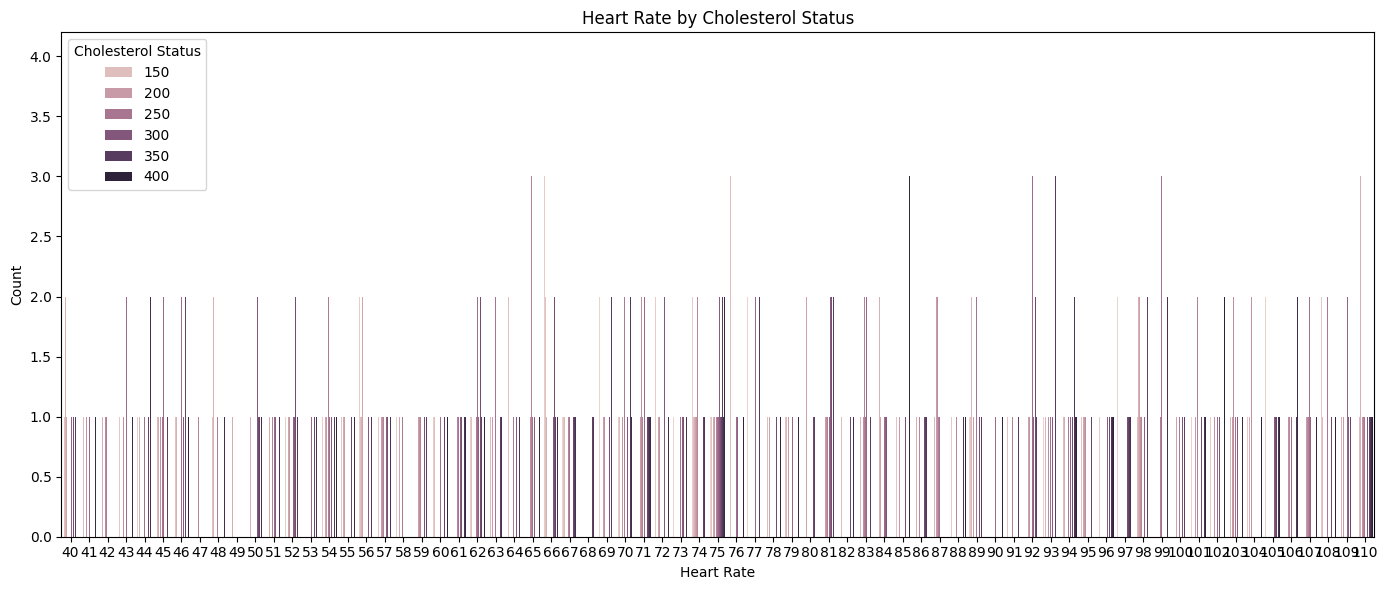

Heart Rate   40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Cholesterol                                                    ...             
120            0    0    1    1    0    1    1    0    0    1  ...    1    2   
121            1    2    2    0    0    0    2    1    0    1  ...    1    0   
122            0    0    1    0    0    1    0    1    0    0  ...    1    1   
123            0    2    0    2    0    0    1    0    1    1  ...    1    0   
124            1    2    1    1    0    1    0    0    1    1  ...    0    1   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
396            0    0    0    0    1    2    1    0    1    0  ...    1    1   
397            0    0    0    0    0    0    0    0    1    1  ...    0    0   
398            0    0    0    1    0    0    0    0    1    0  ...    0    0   
399            1    0    1    0    0    0    0    0    1    2  ...    0    2   
400            0    1    0    0    3    

In [192]:
#Hypothesis 2(Cholesterol)[Shelly Tomar]

# EDA1(Using countplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Heart Attacks rate by Cholesterol Status
plt.figure(figsize=(14, 6))
sns.countplot(x='Heart Rate', hue='Cholesterol', data=smok_data)
plt.title('Heart Rate by Cholesterol Status')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.legend(title='Cholesterol Status')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by Cholesterol status 
contingency_table = pd.crosstab(smok_data['Cholesterol'], smok_data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


# Calculate mean heart rate by Cholesterol status
#This shows the mean heart rates for each Cholesterol status group
mean_heart_rate = smok_data.groupby('Cholesterol')['Heart Rate'].mean() 
print(mean_heart_rate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

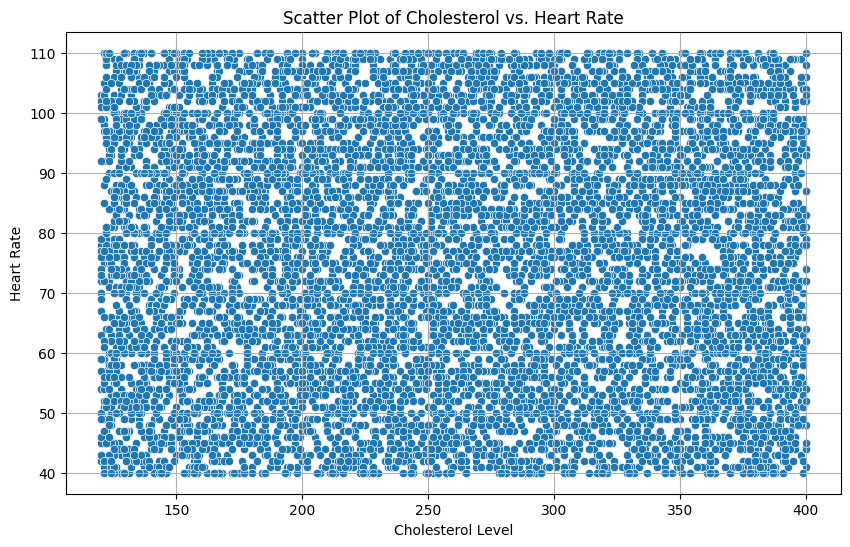

<Figure size 640x480 with 0 Axes>

Heart Rate   40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Cholesterol                                                    ...             
120            0    0    1    1    0    1    1    0    0    1  ...    1    2   
121            1    2    2    0    0    0    2    1    0    1  ...    1    0   
122            0    0    1    0    0    1    0    1    0    0  ...    1    1   
123            0    2    0    2    0    0    1    0    1    1  ...    1    0   
124            1    2    1    1    0    1    0    0    1    1  ...    0    1   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
396            0    0    0    0    1    2    1    0    1    0  ...    1    1   
397            0    0    0    0    0    0    0    0    1    1  ...    0    0   
398            0    0    0    1    0    0    0    0    1    0  ...    0    0   
399            1    0    1    0    0    0    0    0    1    2  ...    0    2   
400            0    1    0    0    3    

In [193]:
#Hypothesis 2(Cholesterol)[Shelly Tomar]

# EDA1(Using box graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#step 1:Check Data Types and Null Values
print(smok_data.info())

# Step 2: Create Scatter Plot for Cholesterol vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cholesterol', y='Heart Rate', data=smok_data)  # Replace with actual column names
plt.title('Scatter Plot of Cholesterol vs. Heart Rate')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Step 3: Show the plot
plt.tight_layout() 
plt.show()

# Step 4: Create a contingency table to analyse the hheart attach rate by Cholesterol status 
contingency_table = pd.crosstab(smok_data['Cholesterol'], smok_data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


In [ ]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA1(Using bar graph)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#So we need to get(systolic and diastolic bp) so we go to data cleaning step and create step 10
# Count occurrences for Systolic BP and Diastolic BP
systolic_counts = data['Systolic BP'].value_counts()
diastolic_counts = data['Diastolic BP'].value_counts()

# Set up the figure size
plt.figure(figsize=(14, 7))

# Create a subplot for Systolic BP
plt.subplot(1, 2, 1)
colors = ['blue' if bp < 120 else 'orange' for bp in systolic_counts.index]
plt.bar(systolic_counts.index, systolic_counts.values, color=colors)
plt.xlabel('Systolic BP')
plt.ylabel('Count')
plt.title('Count of Systolic Blood Pressure')

# Create a subplot for Diastolic BP
plt.subplot(1, 2, 2)
colors = ['green' if bp < 80 else 'red' for bp in diastolic_counts.index]
plt.bar(diastolic_counts.index, diastolic_counts.values, color=colors)
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.title('Count of Diastolic Blood Pressure')

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

In [ ]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA2(Using box plot-for identifying if any outliers are there)
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Box plot for Systolic BP
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Systolic BP'], color='lightblue')
plt.title('Box Plot of Systolic BP')
plt.xlabel('Systolic BP')

# Box plot for Diastolic BP
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Diastolic BP'], color='lightgreen')
plt.title('Box Plot of Diastolic BP')
plt.xlabel('Diastolic BP')

# Adjust layout for better fitting
plt.tight_layout()
plt.show()

In [ ]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA3(bar plot for getting gender wise data)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Create a DataFrame with the 'Gender' column
df_data = data[['Gender']]

# Count the occurrences of each gender
Hyp_num = df_data['Gender'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 7))

#color to differentiate gender
colors = ['green' if gender == 'Male' else 'pink' for gender in Hyp_num.index]
# Create a bar plot using the counts
plt.bar(Hyp_num.index, Hyp_num.values,color=colors)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender wise data')

# Show the plot
plt.show()

In [ ]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA4(grouped analyses between Hypothesis 3 & 4)
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Group by Gender and calculate mean BP values
grouped_bp = data.groupby('Gender')[['Systolic BP', 'Diastolic BP']].mean().reset_index()

# Print the grouped data
print(grouped_bp)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Bar plot for average Systolic and Diastolic BP by Gender
grouped_bp.set_index('Gender').plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Systolic and Diastolic BP by Gender')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure Type', labels=['Systolic BP', 'Diastolic BP'])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified file path
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Map risk categories to numerical values for better plotting
risk_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Ensure the 'Risk of Heart Attack' column is categorical and mapped
df['Risk Numeric'] = df['Risk of Heart Attack'].map(risk_mapping)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Box Plot
plt.subplot(2, 1, 1)
plt.boxplot(
    [df[df['Days of Physical Activity per Week'] == i]['Risk Numeric'] for i in range(0, 8)],
    tick_labels=[str(i) for i in range(0, 8)],  # Use tick_labels instead of labels
    showmeans=True
)
plt.title('Box Plot: Heart Attack Risk by Days of Physical Activity')
plt.xlabel('Days of Physical Activity per Week')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.xticks(rotation=45)
plt.grid()

# Violin Plot
plt.subplot(2, 1, 2)
sns.violinplot(x='Days of Physical Activity per Week', y='Risk Numeric', data=df)
plt.title('Violin Plot: Heart Attack Risk by Days of Physical Activity')
plt.xlabel('Days of Physical Activity per Week')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.yticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified file path
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Map risk categories to numerical values for better plotting
risk_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Ensure the 'Risk of Heart Attack' column is categorical and mapped
df['Risk of Heart Attack'] = pd.Categorical(df['Risk of Heart Attack'], categories=['Low', 'Medium', 'High'])
df['Risk Numeric'] = df['Risk of Heart Attack'].map(risk_mapping)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Scatter Plot
plt.subplot(2, 1, 1)
plt.scatter(df['Age'], df['Risk Numeric'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Heart Attack Risk by Age')
plt.xlabel('Age')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.yticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])
plt.grid()

# Histogram with hue for risk categories
plt.subplot(2, 1, 2)
hist_plot = sns.histplot(data=df, x='Age', hue='Risk of Heart Attack', multiple="stack", bins=30, palette='pastel')
plt.title('Histogram: Age Distribution by Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


In [195]:
#Algorithm-problem 1 Shelly Tomar
#Logistic Regression Modelling
from sklearn.preprocessing import LabelEncoder

# Simplify column names for easier access
smok_data.columns = [col.replace(" ", "_") for col in smok_data.columns]

# Encoding categorical variables (Smoking and Risk_of_Heart_Attack) using LabelEncoder
label_encoder = LabelEncoder()
smok_data['Smoking'] = label_encoder.fit_transform(smok_data['Smoking'])
smok_data['Risk_of_Heart_Attack'] = label_encoder.fit_transform(smok_data['Risk_of_Heart_Attack'])

# Check the unique values for smoking and risk of heart attack after encoding
smok_data[['Smoking', 'Risk_of_Heart_Attack']].head().drop_duplicates()

,Smoking,Risk_of_Heart_Attack
0,0,1


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (Smoking and Heart_Rate) and target (Risk_of_Heart_Attack)
X = smok_data[['Smoking', 'Heart_Rate']]
y = smok_data['Risk_of_Heart_Attack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.502092050209205


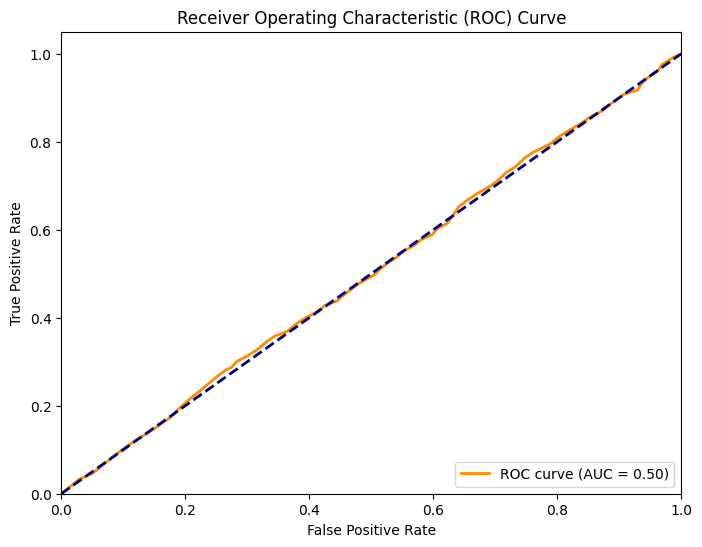

In [197]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get predicted probabilities for the positive class
log_reg.fit(X_train, y_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


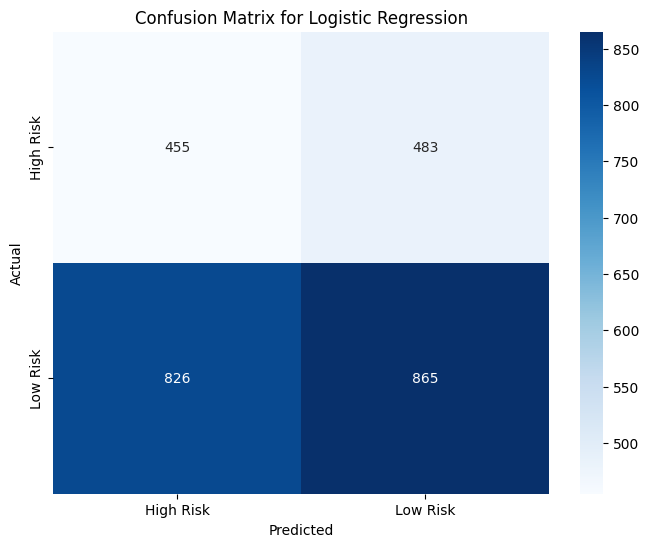

In [199]:


# Display the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['High Risk', 'Low Risk'], yticklabels=['High Risk', 'Low Risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [201]:
# Algorithm-problem 2 shelly Tomar
# SVM model 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Prepare features and target
X = data[['Cholesterol', 'Heart Rate']]
y = data['Risk of Heart Attack'].map({'Low': 0, 'High': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")


SVM Model Accuracy: 0.6463


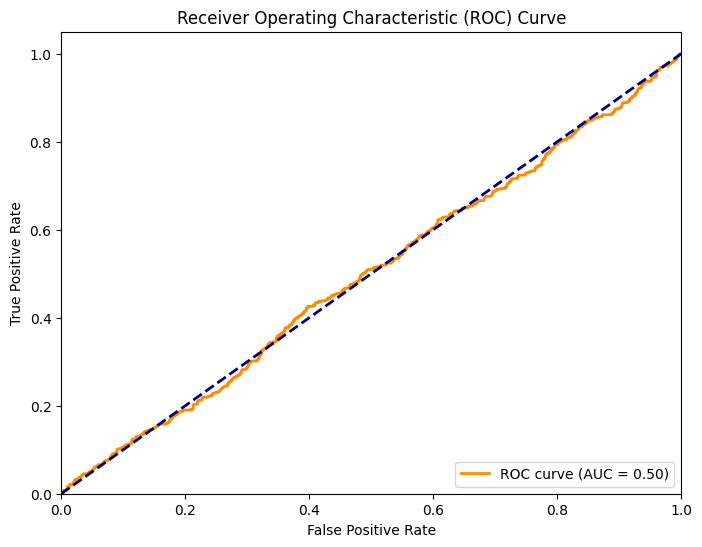

In [204]:
from sklearn.metrics import roc_curve, auc

y_score = svm_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


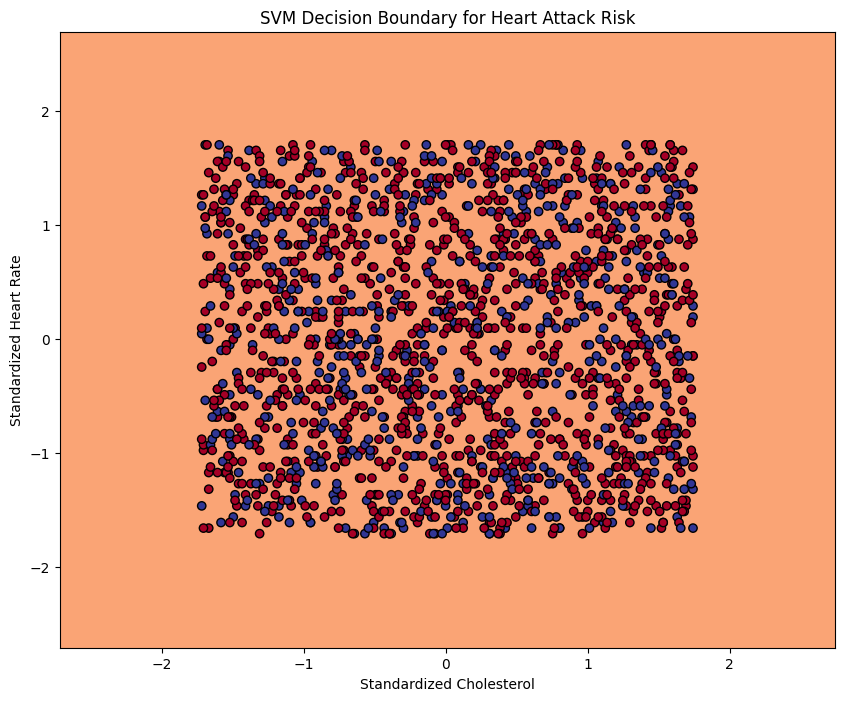

In [205]:
def plot_decision_boundary(X, y, model, ax=None):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        ax = plt.gca()
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('Standardized Cholesterol')
    ax.set_ylabel('Standardized Heart Rate')
    return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X_test_scaled, y_test, svm_model)
plt.title('SVM Decision Boundary for Heart Attack Risk')
plt.show()


classification_report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79      1133
           1       1.00      0.00      0.00       620

    accuracy                           0.65      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.65      0.51      1753

Confusion Matrix:
 [[1133    0]
 [ 620    0]]


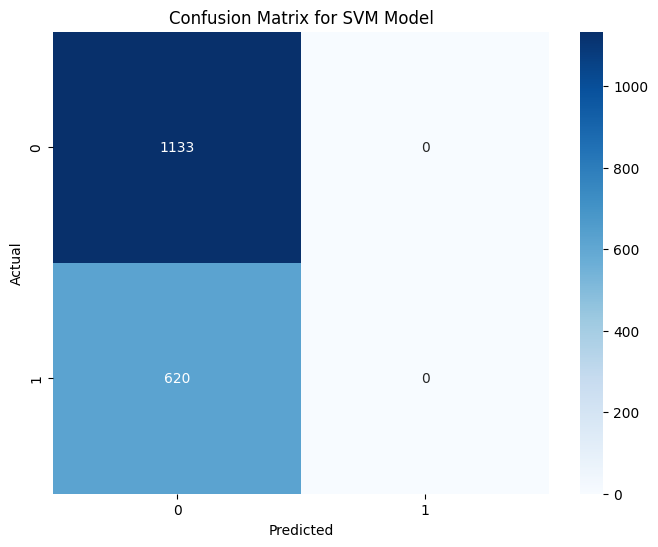

In [207]:
# Print classification report and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("classification_report:\n",classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [203]:
#Problem-3 model selection[Blood_Pressure][Aditya_rawat]
#1. Preprocessing and Data Preparation
data_P3 = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')
# Display the first few rows and summary of the dataset to understand its contents
#data.head(), data.describe(), data.info()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


data_P3['Risk of Heart Attack'] = LabelEncoder().fit_transform(data_P3['Risk of Heart Attack'])

# Feature Selection
X_P3 = data_P3[['Systolic BP', 'Diastolic BP']]
y_P3 = data_P3['Risk of Heart Attack']

# Split Data
X_train_P3, X_test_P3, y_train_P3, y_test_P3 = train_test_split(X_P3, y_P3, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_P3 = scaler.fit_transform(X_train_P3)
X_test_P3 = scaler.transform(X_test_P3)


Random Forest Report:
              precision    recall  f1-score   support

           0       0.39      0.43      0.41       628
           1       0.66      0.63      0.65      1125

    accuracy                           0.56      1753
   macro avg       0.53      0.53      0.53      1753
weighted avg       0.56      0.56      0.56      1753

ROC-AUC Score: 0.53


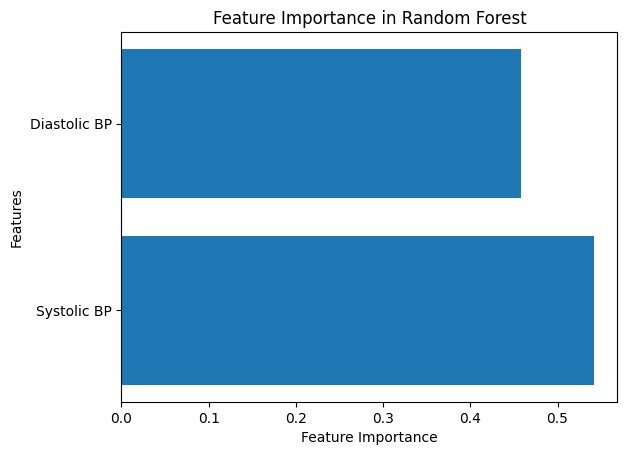

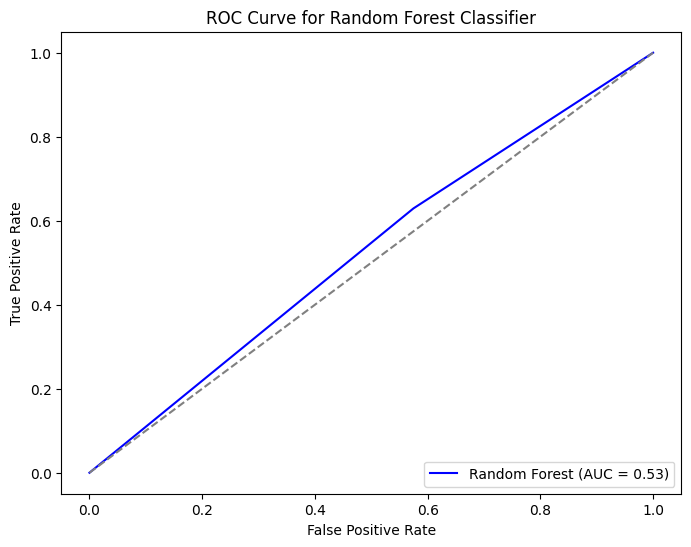

In [162]:
#Algorithm[Problem_3_Aditya_rawat]---RandomForest
#source "Breiman, L. (2001). Random Forests"
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
# Train and predict
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=40)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_P3, y_train_P3)

rf = RandomForestClassifier(max_depth=5, random_state=40, class_weight="balanced")
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test_P3)

# Evaluation
print("Random Forest Report:")
print(classification_report(y_test_P3, y_pred_rf))
print("ROC-AUC Score:", f"{roc_auc_score(y_test_P3, y_pred_rf):.2f}")
# Feature Importance
plt.barh(X_P3.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_P3, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no skill
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [187]:
#Problem-4 model selection[Gender based classification][Aditya_rawat]
#1. Preprocessing and Data Preparation
data_P4 = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


data_P4['Gender'] = LabelEncoder().fit_transform(data_P4['Gender'])

data_P4['Risk of Heart Attack'] = LabelEncoder().fit_transform(data_P4['Risk of Heart Attack'])

# Feature Selection
X_P4 = data_P4[['Gender']]
y_P4= data_P4['Risk of Heart Attack']

# Split Data
X_train_P4, X_test_P4, y_train_P4, y_test_P4 = train_test_split(X_P4, y_P4, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_P4 = scaler.fit_transform(X_train_P4)
X_test_P4 = scaler.transform(X_test_P4)


Accuracy: 0.64
Precision: 0.64
Recall: 1.00
F1 Score: 0.78
ROC AUC Score: 0.50


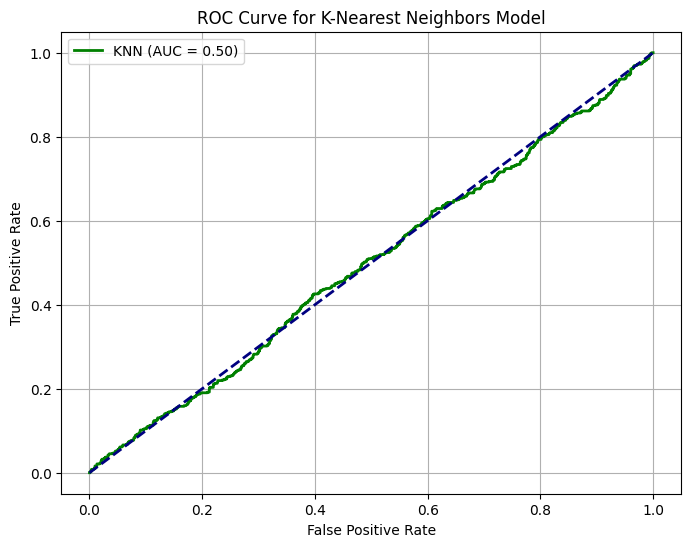

In [210]:
# K-Nearest Neighbors(KNN) Q_4[Aditya_rawat]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_P4, y_train_P4)

# Predict probabilities for ROC curve
y_probs_knn = knn.predict_proba(X_test_P4)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_P4, y_probs_knn)

# Calculate additional metrics
y_pred_knn = knn.predict(X_test_P4)
accuracy_knn = accuracy_score(y_test_P4, y_pred_knn)
precision_knn = precision_score(y_test_P4, y_pred_knn)
recall_knn = recall_score(y_test_P4, y_pred_knn)
f1_knn = f1_score(y_test_P4, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_P4, y_probs_knn)

# Output metrics for analysis
print("Accuracy:", f"{accuracy_knn:.2f}")
print("Precision:", f"{precision_knn:.2f}")
print("Recall:", f"{recall_knn:.2f}")
print("F1 Score:", f"{f1_knn:.2f}")
print("ROC AUC Score:", f"{roc_auc_knn:.2f}")

# Plot ROC Curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-Nearest Neighbors Model")
plt.legend()
plt.grid(True)
plt.show()




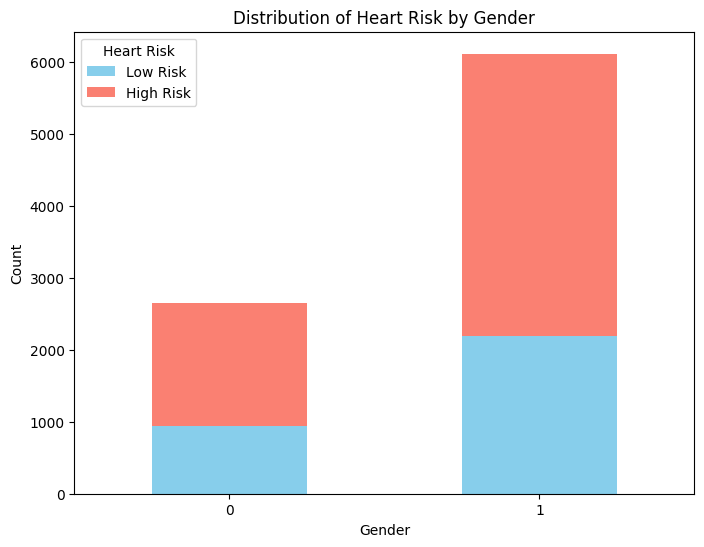

In [232]:

counts = data_P4.groupby(['Gender', 'Risk of Heart Attack']).size().unstack()

# Plot a stacked bar chart
counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title('Distribution of Heart Risk by Gender')
plt.legend(title='Heart Risk', labels=['Low Risk', 'High Risk'])
plt.show()


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters from GridSearchCV: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 64.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Confusion Matrix:
 [[1125    0]
 [ 628    0]]


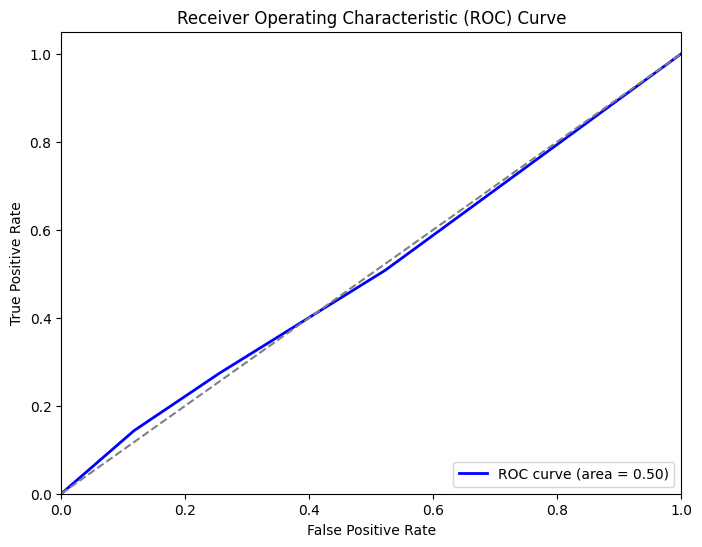

In [234]:
# Problem5 - Prajjwal Mishra
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Select relevant columns
data_selected = data[['Days of Physical Activity per Week', 'Risk of Heart Attack']]

# Map 'Risk of Heart Attack' to binary values: 'High' to 1, 'Low' to 0
data_selected['Risk of Heart Attack'] = data_selected['Risk of Heart Attack'].map({'High': 1, 'Low': 0})

# Split the data into features (X) and target (y)
X = data_selected[['Days of Physical Activity per Week']]
y = data_selected['Risk of Heart Attack']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Trying different depths of the tree
    'min_samples_split': [2, 5, 10],  # Number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples per leaf
    'criterion': ['gini', 'entropy'],  # Try both Gini and Entropy
    'class_weight': ['balanced', None],  # Handle class imbalance
    'min_impurity_decrease': [0.0, 0.01, 0.1]  # Pruning the tree
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print best hyperparameters found by GridSearchCV
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC CURVE
# Get the predicted probabilities for the positive class (High Risk)
y_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting Accuracy: 0.6432103461392165
Gradient Boosting Confusion Matrix:
 [[   0  938]
 [   0 1691]]

AdaBoost Accuracy: 0.6432103461392165
AdaBoost Confusion Matrix:
 [[   0  938]
 [   0 1691]]


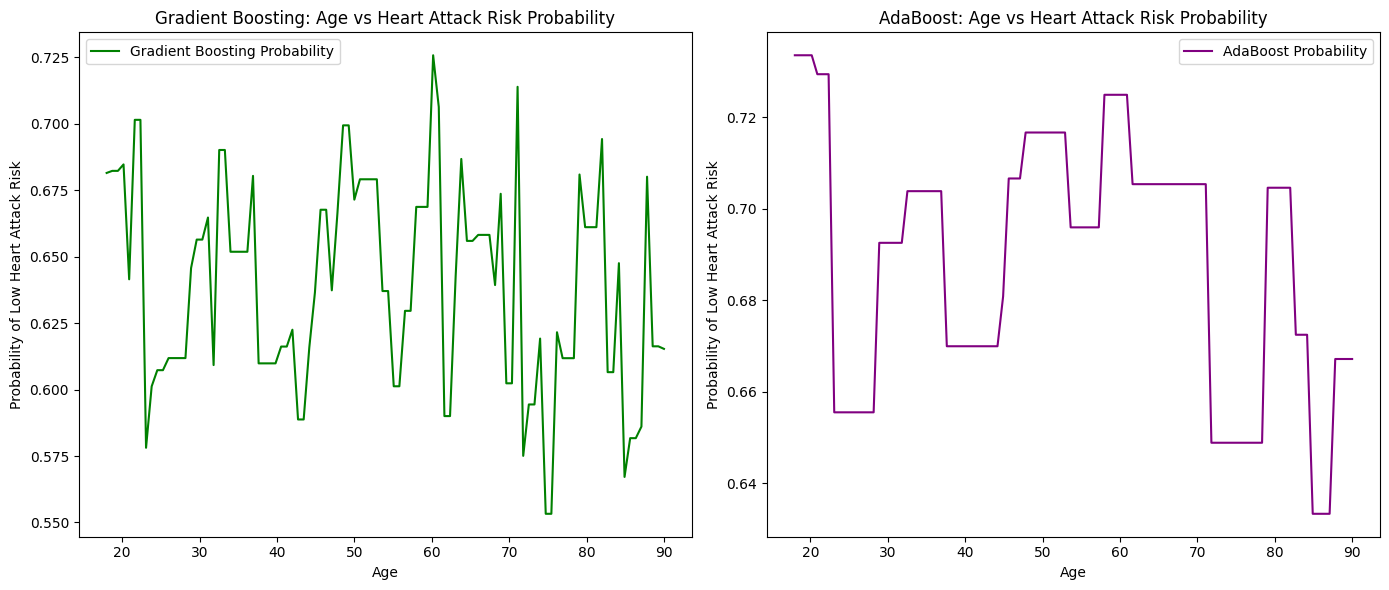

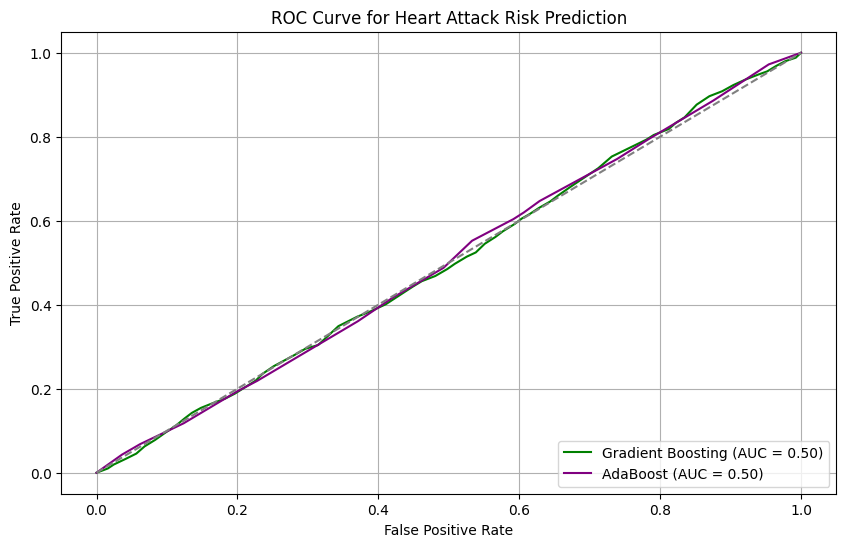

In [238]:
# Problem6 - Prajjwal Mishra
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_curve, auc
# Load the dataset
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')  

data_subset = data[['Age', 'Risk of Heart Attack']]

data_subset.loc[:, 'Risk of Heart Attack'] = label_encoder.fit_transform(data_subset['Risk of Heart Attack'])

label_encoder = LabelEncoder()
data_subset['Risk of Heart Attack'] = label_encoder.fit_transform(data_subset['Risk of Heart Attack'])

X = data_subset[['Age']]
y = data_subset['Risk of Heart Attack']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
gradient_boost = GradientBoostingClassifier(random_state=42)
adaboost = AdaBoostClassifier(algorithm="SAMME", random_state=42) 

# Train the models
gradient_boost.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boost.predict(X_test)
y_pred_ab = adaboost.predict(X_test)

# Calculate accuracy for both models
gb_accuracy = accuracy_score(y_test, y_pred_gb)
ab_accuracy = accuracy_score(y_test, y_pred_ab)

# Generate confusion matrices
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Print accuracy and confusion matrices
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix_gb)
print("\nAdaBoost Accuracy:", ab_accuracy)
print("AdaBoost Confusion Matrix:\n", confusion_matrix_ab)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
ages = pd.DataFrame(np.linspace(X['Age'].min(), X['Age'].max(), 100), columns=['Age'])
probs_gb = gradient_boost.predict_proba(ages)[:, 1]
plt.plot(ages, probs_gb, color='green', label='Gradient Boosting Probability')
plt.xlabel("Age")
plt.ylabel("Probability of Low Heart Attack Risk")
plt.title("Gradient Boosting: Age vs Heart Attack Risk Probability")
plt.legend()

plt.subplot(1, 2, 2)
probs_ab = adaboost.predict_proba(ages)[:, 1]
plt.plot(ages, probs_ab, color='purple', label='AdaBoost Probability')
plt.xlabel("Age")
plt.ylabel("Probability of Low Heart Attack Risk")
plt.title("AdaBoost: Age vs Heart Attack Risk Probability")
plt.legend()

plt.tight_layout()
plt.show()





y_proba_gb = gradient_boost.predict_proba(X_test)[:, 1]  
y_proba_ab = adaboost.predict_proba(X_test)[:, 1]


fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)


fpr_ab, tpr_ab, _ = roc_curve(y_test, y_proba_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)


plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, color='green', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_ab, tpr_ab, color='purple', label=f'AdaBoost (AUC = {roc_auc_ab:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Attack Risk Prediction")
plt.legend(loc="lower right")
plt.grid()

plt.show()